In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import re
import datetime as date
pd.set_option('display.max_columns', None)

In [2]:
# importing data
# data from Kenya

Kenya_customer_df= pd.read_csv('Kenya Customers.csv')
Kenya_orders_df= pd.read_csv('Kenya Orders.csv')
Kenya_deliveries_df= pd.read_csv('Kenya Deliveries.csv')

# Data from Nigeria

Nigeria_customer_df= pd.read_csv('Nigeria Customers.csv')
Nigeria_orders_df= pd.read_csv('Nigeria Orders.csv')
Nigeria_deliveries_df= pd.read_csv('Nigeria Deliveries.csv')

In [3]:
# exploring columns from Kenya data

Kenya_customer_df.columns, Kenya_orders_df.columns,Kenya_deliveries_df.columns

(Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
        'Language', 'Outstanding Amount', 'Loyalty Points',
        'Number of employees', 'Upload restuarant location'],
       dtype='object'),
 Index(['Order ID', 'Order Status', 'Category Name', 'SKU',
        'Customization Group', 'Customization Option', 'Quantity', 'Unit Price',
        'Cost Price', 'Total Cost Price', 'Total Price', 'Order Total',
        'Sub Total', 'Tax', 'Delivery Charge', 'Tip', 'Discount',
        'Remaining Balance', 'Payment Method', 'Additional Charge',
        'Taxable Amount', 'Transaction ID', 'Currency Symbol',
        'Transaction Status', 'Promo Code', 'Customer ID', 'Merchant ID',
        'Store Name', 'Pickup Address', 'Description', 'Distance (in km)',
        'Order Time', 'Pickup Time', 'Delivery Time', 'Ratings', 'Reviews',
        'Merchant Earning', 'Commission Amount', 'Commission Payout Status',
        'Order Preparation Time', 'Debt Amount', 'Redeemed Loyalty Po

In [4]:
Kenya_customer_df.dtypes

Customer ID                     int64
Last Used Platform             object
Is Blocked                      int64
Created At                     object
Language                       object
Outstanding Amount              int64
Loyalty Points                  int64
Number of employees           float64
Upload restuarant location     object
dtype: object

In [5]:
Kenya_orders_df.dtypes

Order ID                      int64
Order Status                 object
Category Name                object
SKU                          object
Customization Group         float64
Customization Option        float64
Quantity                      int64
Unit Price                    int64
Cost Price                   object
Total Cost Price             object
Total Price                   int64
Order Total                 float64
Sub Total                     int64
Tax                          object
Delivery Charge              object
Tip                          object
Discount                     object
Remaining Balance             int64
Payment Method               object
Additional Charge            object
Taxable Amount               object
Transaction ID                int64
Currency Symbol              object
Transaction Status          float64
Promo Code                  float64
Customer ID                   int64
Merchant ID                   int64
Store Name                  

In [6]:
Kenya_deliveries_df.isnull().any()

Task_ID                  False
Order_ID                 False
Relationship             False
Team_Name                False
Task_Type                False
Notes                     True
Agent_ID                 False
Agent_Name               False
Distance(m)              False
Total_Time_Taken(min)    False
Pick_up_From             False
Start_Before             False
Complete_Before          False
Completion_Time          False
Task_Status              False
Ref_Images               False
Rating                   False
Review                    True
Latitude                 False
Longitude                False
Tags                      True
Promo_Applied             True
Custom_Template_ID       False
Task_Details_QTY         False
Task_Details_AMOUNT      False
Special_Instructions     False
Tip                      False
Delivery_Charges         False
Discount                 False
Subtotal                 False
Payment_Type             False
Task_Category            False
Earning 

In [7]:
# exploring columns from Nigeria data

Nigeria_customer_df.columns, Nigeria_orders_df.columns,Nigeria_deliveries_df.columns

(Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
        'Language', 'Outstanding Amount', 'Loyalty Points',
        'Number of Employees'],
       dtype='object'),
 Index(['Order ID', 'Order Status', 'Category Name', 'SKU',
        'Customization Group', 'Customization Option', 'Quantity', 'Unit Price',
        'Cost Price', 'Total Cost Price', 'Total Price', 'Order Total',
        'Sub Total', 'Tax', 'Delivery Charge', 'Tip', 'Discount',
        'Remaining Balance', 'Payment Method', 'Additional Charge',
        'Taxable Amount', 'Transaction ID', 'Currency Symbol',
        'Transaction Status', 'Promo Code', 'Customer ID', 'Merchant ID',
        'Store Name', 'Pickup Address', 'Description', 'Distance (in km)',
        'Order Time', 'Pickup Time', 'Delivery Time', 'Ratings', 'Reviews',
        'Merchant Earning', 'Commission Amount', 'Commission Payout Status',
        'Order Preparation Time', 'Redeemed Loyalty Points',
        'Consumed Loyalty Points', 'Ca

In [8]:
#checking for null values - Kenyan Data

Kenya_customer_df.isnull().sum(), Kenya_orders_df.isnull().sum(),Kenya_deliveries_df.isnull().sum()

(Customer ID                      0
 Last Used Platform               0
 Is Blocked                       0
 Created At                       0
 Language                         0
 Outstanding Amount               0
 Loyalty Points                   0
 Number of employees           1038
 Upload restuarant location    4158
 dtype: int64,
 Order ID                        0
 Order Status                    0
 Category Name                   6
 SKU                             3
 Customization Group         12242
 Customization Option        12242
 Quantity                        0
 Unit Price                      0
 Cost Price                      0
 Total Cost Price                0
 Total Price                     0
 Order Total                     0
 Sub Total                       0
 Tax                             0
 Delivery Charge                 0
 Tip                             0
 Discount                        0
 Remaining Balance               0
 Payment Method                

In [9]:
#checking for null values - Nigerian Data

Nigeria_customer_df.isnull().sum(), Nigeria_orders_df.isnull().sum(),Nigeria_deliveries_df.isnull().sum()

(Customer ID              0
 Last Used Platform       0
 Is Blocked               0
 Created At               0
 Language                 0
 Outstanding Amount       0
 Loyalty Points           0
 Number of Employees    490
 dtype: int64,
 Order ID                       0
 Order Status                   0
 Category Name                  0
 SKU                            0
 Customization Group         1429
 Customization Option        1429
 Quantity                       0
 Unit Price                     0
 Cost Price                     0
 Total Cost Price               0
 Total Price                    0
 Order Total                    0
 Sub Total                      0
 Tax                            0
 Delivery Charge                0
 Tip                            0
 Discount                       0
 Remaining Balance              0
 Payment Method                 0
 Additional Charge              0
 Taxable Amount                 0
 Transaction ID                 0
 Currency Sym

In [10]:
Nigeria_customer_df.dtypes, Nigeria_orders_df.dtypes,Nigeria_deliveries_df.dtypes

(Customer ID              int64
 Last Used Platform      object
 Is Blocked               int64
 Created At              object
 Language                object
 Outstanding Amount       int64
 Loyalty Points           int64
 Number of Employees    float64
 dtype: object,
 Order ID                      int64
 Order Status                 object
 Category Name                object
 SKU                          object
 Customization Group         float64
 Customization Option        float64
 Quantity                      int64
 Unit Price                    int64
 Cost Price                    int64
 Total Cost Price              int64
 Total Price                   int64
 Order Total                 float64
 Sub Total                     int64
 Tax                          object
 Delivery Charge              object
 Tip                          object
 Discount                     object
 Remaining Balance             int64
 Payment Method               object
 Additional Charge       

From the data its posible to join Customer data with Orders data using the common culumn 'Customer ID', and Orders data with the delivery data using 'Order ID', for both countries. Assuming that the two are uniquely generated

### Data preprocessing

In [11]:
# renaming column Order ID in Oreders data to match that in deliveries data to ease merging.

Kenya_orders_df.rename(columns = {'Order ID':'order_id','Delivery Charge':'Delivery_Charges','Ratings':'Rating','Reviews':'Review'}, inplace = True)
Nigeria_orders_df.rename(columns = {'Order ID':'order_id','Delivery Charge':'Delivery_Charges','Ratings':'Rating','Reviews':'Review'}, inplace = True)

A funtion to extract Order ID from Deliveries data

In [12]:
def extract_order_id(data):
    '''
    - Removes non_numerics characters then remove the last digit from the results.
    '''
    result = ''.join(re.findall(r'\d+', data))
    Order_ID = result[:-1]
    
    return Order_ID

In [13]:
# Applying the fuction on Kenya deliveries and dropping Order_ID

Kenya_deliveries_df['order_id']=Kenya_deliveries_df['Order_ID'].apply(extract_order_id)
Kenya_deliveries_df= Kenya_deliveries_df.drop('Order_ID', 1)


# Applying the fuction on Nigeria deliveries and dropping Order_ID

Nigeria_deliveries_df['order_id']=Nigeria_deliveries_df['Order_ID'].apply(extract_order_id)
Nigeria_deliveries_df= Nigeria_deliveries_df.drop('Order_ID', 1)

In [14]:
Kenya_orders_df.shape,Kenya_deliveries_df.shape,Kenya_customer_df.shape

((12242, 47), (44983, 36), (4177, 9))

### Merging Kenya dataset

In [15]:
Kenya_customer_df['Customer ID'].nunique()

4177

In [16]:
# Changing data types of columns from different dataset to merge on

Kenya_orders_df['Rating'] = Kenya_orders_df['Rating'].astype(str)
Kenya_orders_df['Review'] = Kenya_orders_df['Review'].astype(str)
Kenya_deliveries_df['Rating'] = Kenya_deliveries_df['Rating'].astype(str)

Nigeria_orders_df['Rating'] = Nigeria_orders_df['Rating'].astype(str)
Nigeria_orders_df['Review'] = Nigeria_orders_df['Review'].astype(str)
Nigeria_deliveries_df['Rating'] = Nigeria_deliveries_df['Rating'].astype(str)

- Merged Orders data to Deliveries data then merge to Customer data.
- Used left join to return only customers who placed orders, this will help in Retention analysis.

In [17]:
# Merging Orders with deliveries.

Kenya_orders_df['order_id'] = Kenya_orders_df['order_id'].apply(str)
Orders_delivery_kenya_df = pd.merge(Kenya_orders_df, Kenya_deliveries_df, how= "outer", on= 'order_id')

# merging to customer data.

Merged_kenya_data = pd.merge(Kenya_customer_df, Orders_delivery_kenya_df, how = 'left')

#creating new column country to help visualize/analyze our as per country.
Merged_kenya_data = Merged_kenya_data.assign(country='Kenya')


In [18]:
Orders_delivery_kenya_df.shape,Merged_kenya_data.shape,

((98176, 82), (69047, 91))

In [19]:
#Number of customers from Kenya

Merged_kenya_data['Customer ID'].nunique()

4177

In [20]:
Merged_kenya_data['order_id'].nunique()

3451

In [21]:
Merged_kenya_data.shape

(69047, 91)

### Merging Nigeria datasets.

In [22]:
# Merging Orders with deliveries.

Nigeria_orders_df['order_id'] = Nigeria_orders_df['order_id'].apply(str)
Orders_delivery_Nigeria_df = pd.merge(Nigeria_orders_df, Nigeria_deliveries_df, how= "outer")

# merging to customer data.

Merged_Nigeria_data = pd.merge(Nigeria_customer_df, Orders_delivery_Nigeria_df, how = 'left')

#creating new column country to help visualize/analyze our as per country.
Merged_Nigeria_data = Merged_Nigeria_data.assign(country='Nigeria')

In [23]:
Orders_delivery_Nigeria_df.shape,Merged_Nigeria_data.shape

((9448, 73), (2372, 81))

In [24]:
# number of customers from Nigeria

Merged_Nigeria_data['Customer ID'].nunique()

1095

In [25]:
#total orders Nigeria

Merged_Nigeria_data['order_id'].nunique()

944

In [26]:
# Last Kenyan order and Nigeria

Kenya_orders_df['Order Time'].max(), Nigeria_orders_df['Order Time'].max()

('2022-02-17T16:36:27.000Z', '2022-02-17T12:03:13.000Z')

In [27]:
#First Kenya Order and Nigeria

Kenya_orders_df['Order Time'].min(),Kenya_orders_df['Order Time'].min()

('2022-01-01T00:59:43.000Z', '2022-01-01T00:59:43.000Z')

In [28]:
# last Kenyan delivery and Nigeria

Kenya_deliveries_df['Completion_Time'].max(),Nigeria_deliveries_df['Completion_Time'].max() 

('31 Oct 2021 11:40:28 am', '31 Oct 2021 06:59:36 pm')

### Merging Kenya and Nigeria Dataset

In [29]:
Merged_df = pd.concat([Merged_kenya_data, Merged_Nigeria_data], axis=0)

In [30]:
Merged_df.shape

(71419, 97)

In [31]:
#Total customers from from both countries

Merged_df['Customer ID'].isnull().any()

False

In [32]:
Merged_df['Customer ID'].nunique()

5272

In [33]:
Merged_df['order_id'].nunique()

4395

In [34]:
# saving Merged_df as csv

#Merged_df.to_csv('Merged_df.csv')

### Data cleaning

In [36]:
Merged_df.describe()

,Customer ID,Is Blocked,Outstanding Amount,Loyalty Points,Number of employees,Customization Group,Customization Option,Quantity,Unit Price,Total Price,Order Total,Sub Total,Remaining Balance,Transaction ID,Transaction Status,Promo Code,Merchant ID,Distance (in km),Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Cancellation Reason,Flat Discount,Task_ID,Relationship,Longitude,Number of Employees
count,7.141900e+04,71419.000000,71419.0,71419.000000,5.254300e+04,0.0,0.0,66849.000000,66849.000000,6.684900e+04,6.684900e+04,6.684900e+04,66849.0,66849.0,0.0,0.0,6.684900e+04,66849.000000,0.0,0.0,0.0,66849.0,0.0,66849.0,6.540500e+04,6.540500e+04,65405.000000,1.444000e+03
mean,4.372444e+06,0.001358,0.0,851.391142,3.288319e+05,NaN,NaN,2.984831,1341.215142,3.593658e+03,1.634836e+04,1.639052e+04,0.0,0.0,NaN,NaN,8.968599e+05,269.243530,NaN,NaN,NaN,0.0,NaN,0.0,3.608078e+08,3.608078e+29,36.521066,7.377036e+08
std,3.676191e+05,0.036829,0.0,1068.055018,3.293408e+07,NaN,NaN,4.183416,3088.102661,2.256586e+04,2.985819e+04,2.999118e+04,0.0,0.0,NaN,NaN,2.236147e+04,1740.479738,NaN,NaN,NaN,0.0,NaN,0.0,4.379579e+06,4.379579e+27,3.372739,2.361461e+09
min,3.144837e+06,0.000000,0.0,0.000000,-2.000000e+00,NaN,NaN,1.000000,20.000000,2.500000e+01,1.080000e+03,2.000000e+03,0.0,0.0,NaN,NaN,8.935550e+05,0.980000,NaN,NaN,NaN,0.0,NaN,0.0,3.507619e+08,3.507619e+29,-1.300599,1.000000e+00
25%,4.083504e+06,0.000000,0.0,124.000000,3.000000e+00,NaN,NaN,1.000000,75.000000,2.000000e+02,5.480000e+03,5.530000e+03,0.0,0.0,NaN,NaN,8.935550e+05,5.030000,NaN,NaN,NaN,0.0,NaN,0.0,3.577909e+08,3.577909e+29,36.787904,3.000000e+00
50%,4.488872e+06,0.000000,0.0,391.000000,5.000000e+00,NaN,NaN,1.000000,250.000000,6.700000e+02,9.683000e+03,9.771000e+03,0.0,0.0,NaN,NaN,8.935550e+05,6.410000,NaN,NaN,NaN,0.0,NaN,0.0,3.614719e+08,3.614719e+29,36.812464,4.000000e+00
75%,4.689177e+06,0.000000,0.0,1031.000000,8.000000e+00,NaN,NaN,3.000000,1740.000000,2.158000e+03,2.173600e+04,2.185000e+04,0.0,0.0,NaN,NaN,8.935550e+05,11.230000,NaN,NaN,NaN,0.0,NaN,0.0,3.641868e+08,3.641868e+29,36.881860,8.000000e+00
max,5.189011e+06,1.000000,0.0,23307.000000,7.034704e+09,NaN,NaN,108.000000,62000.000000,1.257000e+06,1.252000e+06,1.257000e+06,0.0,0.0,NaN,NaN,1.048159e+06,12012.180000,NaN,NaN,NaN,0.0,NaN,0.0,3.681058e+08,3.681058e+29,37.050000,9.159746e+09


* checking for null values

In [37]:
Merged_df.isnull().any()

Customer ID           False
Last Used Platform    False
Is Blocked            False
Created At            False
Language              False
                      ...  
Delivery_Charges       True
Tip                    True
Discount               True
Rating                 True
Review                 True
Length: 97, dtype: bool

In [38]:
Merged_df.order_id.isnull().any(), Merged_df['Order Time'].isnull().any()

(True, True)

In [39]:
# Drop all nulls Order_id or Order Time

Merged_df = Merged_df.dropna(subset=['order_id', 'Order Time'], how='all')

In [40]:
# Returning the necessary columns

Merged_data = Merged_df[['Customer ID','order_id','Category Name','Order Status','Last Used Platform',
                        'Quantity','Total Price', 'Order Total','Loyalty Points',
                       'Additional Charge','Transaction ID','country','Order Time',
                       'Delivery Time','Debt Amount','Team_Name','Agent_ID']]

In [41]:
Merged_data.isna().sum()

Customer ID              0
order_id                 0
Category Name           33
Order Status             0
Last Used Platform       0
Quantity                 0
Total Price              0
Order Total              0
Loyalty Points           0
Additional Charge        0
Transaction ID           0
country                  0
Order Time               0
Delivery Time            0
Debt Amount           1429
Team_Name             1444
Agent_ID              1444
dtype: int64

In [42]:
Merged_data['Customer ID'].nunique()

702

In [43]:
#checking currency symbols within datasets.

Merged_kenya_data['Currency Symbol'].unique(), Merged_Nigeria_data['Currency Symbol'].unique()

(array([nan, 'KSh'], dtype=object), array([nan, '₦'], dtype=object))

### EDA

In [44]:
# Converting columns to datetime and extracting yyy-mm-dd.

Merged_data[["Order Time", "Delivery Time"]] = Merged_data[["Order Time", "Delivery Time"]].apply(pd.to_datetime)
Merged_data['Order_date'] = pd.to_datetime(Merged_data['Order Time'].dt.strftime('%Y-%m-%d'))
Merged_data['month_year'] = Merged_data['Order_date'].dt.to_period('M')

In [45]:
Merged_df['Created At'].min(),Merged_data['Order Time'].min()

('2021-04-21T07:15:56.000Z', Timestamp('2022-01-01 00:59:43+0000', tz='UTC'))

In [46]:
Merged_data['month_year'] = Merged_data['month_year'].astype(str)
Merged_data['month_year'] = pd.to_datetime(Merged_data['month_year'])

In [47]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66849 entries, 32 to 2371
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Customer ID         66849 non-null  int64              
 1   order_id            66849 non-null  object             
 2   Category Name       66816 non-null  object             
 3   Order Status        66849 non-null  object             
 4   Last Used Platform  66849 non-null  object             
 5   Quantity            66849 non-null  float64            
 6   Total Price         66849 non-null  float64            
 7   Order Total         66849 non-null  float64            
 8   Loyalty Points      66849 non-null  int64              
 9   Additional Charge   66849 non-null  object             
 10  Transaction ID      66849 non-null  float64            
 11  country             66849 non-null  object             
 12  Order Time          66849 non-nu

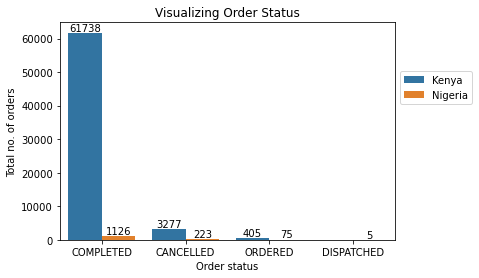

In [48]:
ax= sns.countplot(Merged_data['Order Status'],hue=Merged_data['country'])
plt.title('Visualizing Order Status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Order status')
plt.ylabel('Total no. of orders')
ax.legend(bbox_to_anchor=(1,0.8))
plt.ticklabel_format(style='plain', axis='y')
#plt.savefig('Order statuses between two countries.png',bbox_inches='tight')

Text(0.5, 1.0, 'Categories performance')

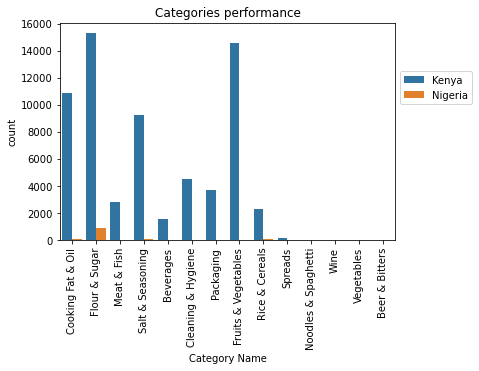

In [49]:
# visualizing Category performances per country

sns.countplot(Merged_data['Category Name'], hue= Merged_data['country'])
plt.legend(bbox_to_anchor=(1,0.8))
plt.xticks(rotation=90)
plt.title('Categories performance')
#plt.savefig('Category performaances per country.png',bbox_inches='tight')

<AxesSubplot:xlabel='Last Used Platform', ylabel='count'>

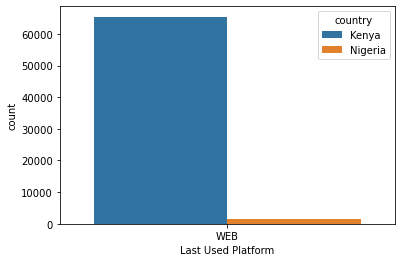

In [50]:
# visualizing Platforms used by customers

sns.countplot(Merged_data['Last Used Platform'],hue= Merged_data['country'])
#plt.savefig('Platforms used per country.png',bbox_inches='tight')

There is only one single record for the above, probably this could be improved to understand what majority of customers are using. This could intern help in marketing strategy.

* checking for outliers

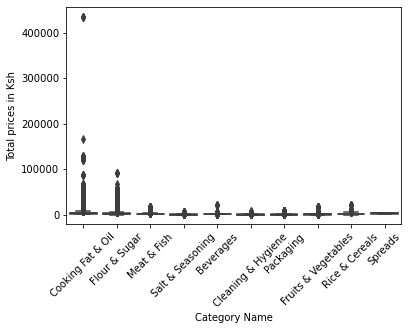

In [51]:
sns.boxplot(data=Merged_data[Merged_data["country"]=="Kenya"],x="Category Name", y= "Total Price")
plt.ylabel('Total prices in Ksh')
plt.xticks(rotation=45)
plt.show()

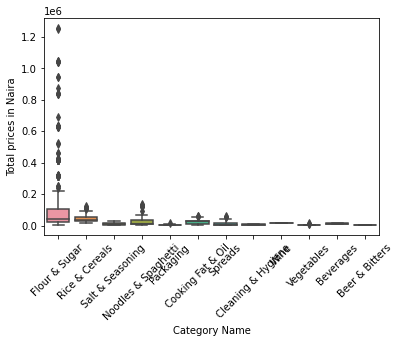

In [52]:
sns.boxplot(data=Merged_data[Merged_data["country"]=="Nigeria"],x="Category Name", y= "Total Price")
plt.ylabel('Total prices in Naira')
plt.xticks(rotation=45)
plt.show()

### CHECKING FOR SEASONALITY ACROSS COUNTRIES

In [53]:
customer_df= Merged_data.groupby(['country','month_year',]).agg({'Customer ID':'count','order_id':'count','Total Price':'sum'})
customer_distribution_df= customer_df.reset_index()

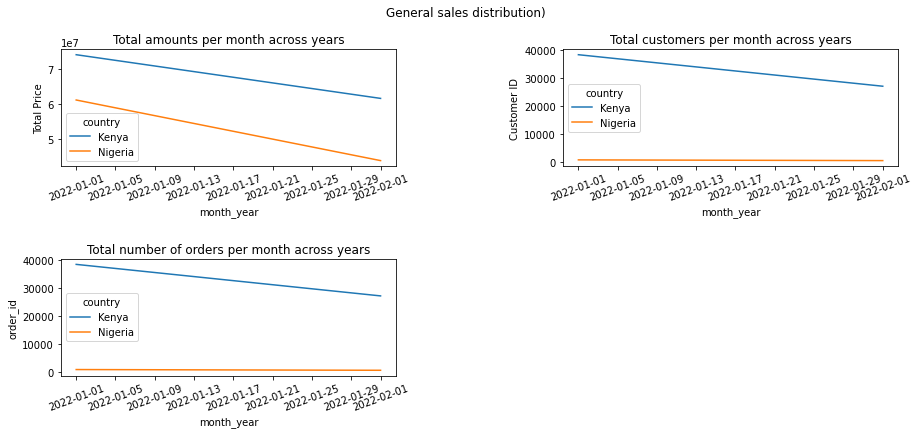

In [54]:
#visualizing the General season patterns for the business

f, axes =  plt.subplots(2, 2, figsize=(15, 6),gridspec_kw={'hspace': 0.8, 'wspace': 0.5})
plt.suptitle('General sales distribution)')
axes.flat[-1].set_visible(False)

ax=sns.lineplot(data=customer_distribution_df,x='month_year', y= 'Total Price', hue= 'country', ax=axes[0,0])
ax.set_title('Total amounts per month across years')
ax.tick_params('x', labelrotation=20)

ax=sns.lineplot(data=customer_distribution_df,x='month_year', y= 'Customer ID', hue= 'country', ax=axes[0,1])
ax.set_title('Total customers per month across years')
ax.tick_params('x', labelrotation=20)

ax=sns.lineplot(data=customer_distribution_df,x='month_year', y= 'order_id', hue= 'country', ax=axes[1,0])
ax.set_title('Total number of orders per month across years')
ax.tick_params('x', labelrotation=20)

#plt.savefig('General season patterns.png',bbox_inches='tight')

* Products seasons

### Corhort Analysis

In [56]:
# A function to parse the date Time based cohort:  first day of month
def get_month(x): 
    return date.datetime(x.year, x.month, 1)

# Create transaction_date column based on month
Merged_data['TransactionMonth'] = Merged_data['Order Time'].apply(get_month) 

# Grouping by customer_id and Transaction month to select all the months customer made purchases
grouping = Merged_data.groupby('Customer ID')['TransactionMonth']

# Assigning a minimum purchase/order date to the dataset.
Merged_data['CohortMonth'] = grouping.transform('min')

# # printing top 5 rows
#Merged_data.sample(2)

In [57]:
def diff_month(x):
    """
    Function to calculate years_diff and months_diff
    """
    x1 = x['TransactionMonth']

    x2 = x["CohortMonth"]

    return ((x1.year - x2.year) * 12 + x1.month - x2.month)+1


Merged_data['cohort_idx'] = Merged_data.apply(lambda x: diff_month(x), axis=1)

#Merged_data

In [58]:
# grouping with cohortmonth and cohortindex to get total of users per cohortindex
grouping = Merged_data.groupby(['CohortMonth', 'cohort_idx'])

# Counting number of unique customer Id's
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='cohort_idx',
                                 values = 'Customer ID')

cohort_data

,CohortMonth,cohort_idx,Customer ID
0,2022-01-01,1,557
1,2022-01-01,2,344
2,2022-02-01,1,145


Text(32.999999999999986, 0.5, 'First Purchase Cohort')

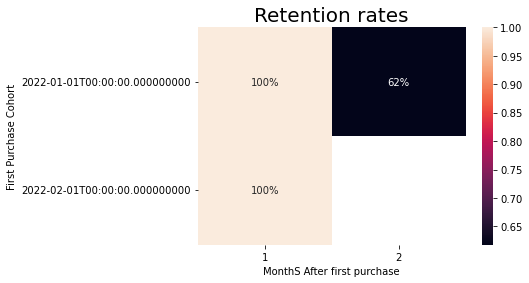

In [59]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

sns.heatmap(retention, annot=True, fmt='.0%')
plt.title('Retention rates', fontsize = 20)
plt.xlabel('MonthS After first purchase')
plt.ylabel('First Purchase Cohort')
#plt.savefig("active credit months region.png", bbox_inches='tight')

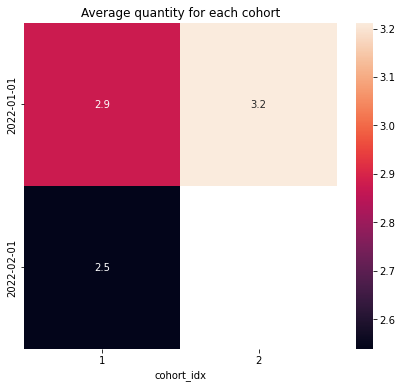

In [60]:
#Average quantity for each cohort

grouping = Merged_data.groupby(['CohortMonth', 'cohort_idx'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='cohort_idx',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(7, 6))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True)
plt.savefig("AVG. Quantity.png", bbox_inches='tight')
plt.show()

### customer classification

In [62]:
Merged_data.head(1)

,Customer ID,order_id,Category Name,Order Status,Last Used Platform,Quantity,Total Price,Order Total,Loyalty Points,Additional Charge,Transaction ID,country,Order Time,Delivery Time,Debt Amount,Team_Name,Agent_ID,Order_date,month_year,TransactionMonth,CohortMonth,cohort_idx
32,3365019,11155410,Cooking Fat & Oil,COMPLETED,WEB,1.0,4320.0,6470.0,68,-,0.0,Kenya,2022-02-11 20:02:56+00:00,2022-02-12 08:00:00+00:00,-,Default Team,1092535,2022-02-11,2022-02-01,2022-02-01,2022-02-01,1


In [70]:
#Returning customer_df data with only columns of interest.

customer_df =Merged_data[["Customer ID", "order_id","Order_date", "Order Total","Loyalty Points"]]
customer_df.head(1)

,Customer ID,order_id,Order_date,Order Total,Loyalty Points
32,3365019,11155410,2022-02-11,6470.0,68


In [80]:
snapshot_date = max(customer_df.Order_date) + date.timedelta(days=1)
# Aggregate data by each customer
customers = customer_df.groupby(['Customer ID','Loyalty Points']).agg({
    'Order_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'Order Total': 'sum'})
# Rename columns
customers.rename(columns = {'Order_date': 'Recency',
                            'order_id': 'Frequency',
                            'Order Total': 'MonetaryValue'},inplace=True)

In [83]:
customer=customers.reset_index()
customer.head(1)

,Customer ID,Loyalty Points,Recency,Frequency,MonetaryValue
0,3365019,68,7,10,62510.0


In [85]:
# Import library
from sklearn.preprocessing import StandardScaler

# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data

scaler.fit(customers)
customers_normalized = scaler.transform(customers)

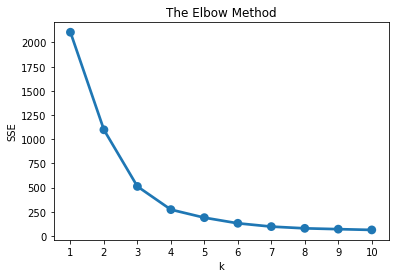

In [86]:
# parameter tuning

from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

from the above graph we can tell that there are around 4 classes of customers

In [90]:
# fiting the model

model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(702,)

In [91]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          6.78    107.80  1.663252e+06   501
1          2.00   9994.00  2.047752e+08     1
2         33.95     14.24  2.740355e+05   200